In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

newdf = pd.read_excel('oil pred data.xlsx')

In [2]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)

In [3]:
#Data is highly skewed and depends on the well,hence I have used padding to fill the missing values 

newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].ffill()

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].ffill()

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].ffill()

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].ffill()

newdf['AVG_ANNULUS_PRESSURE'] = newdf['AVG_ANNULUS_PRESSURE'].ffill()

newdf['AVG_CHOKE_SIZE_PRODN'] = newdf['AVG_CHOKE_SIZE_PRODN'].ffill()

newdf['AVG_WELLHEAD_PRESSURE_PRODN'] = newdf['AVG_WELLHEAD_PRESSURE_PRODN'].ffill()

newdf['AVG_WELLHEAD_TEMP_PRODN'] = newdf['AVG_WELLHEAD_TEMP_PRODN'].ffill()

newdf['DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE'] = newdf['DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE'].ffill()

newdf['BOREHOLE_OIL_VOLUME'] = newdf['BOREHOLE_OIL_VOLUME'].ffill()

newdf['BOREHOLE_OIL_VOLUME'] = newdf['BOREHOLE_OIL_VOLUME'].ffill()

newdf['BOREHOLE_WATER_VOLUME'] = newdf['BOREHOLE_WATER_VOLUME'].ffill()


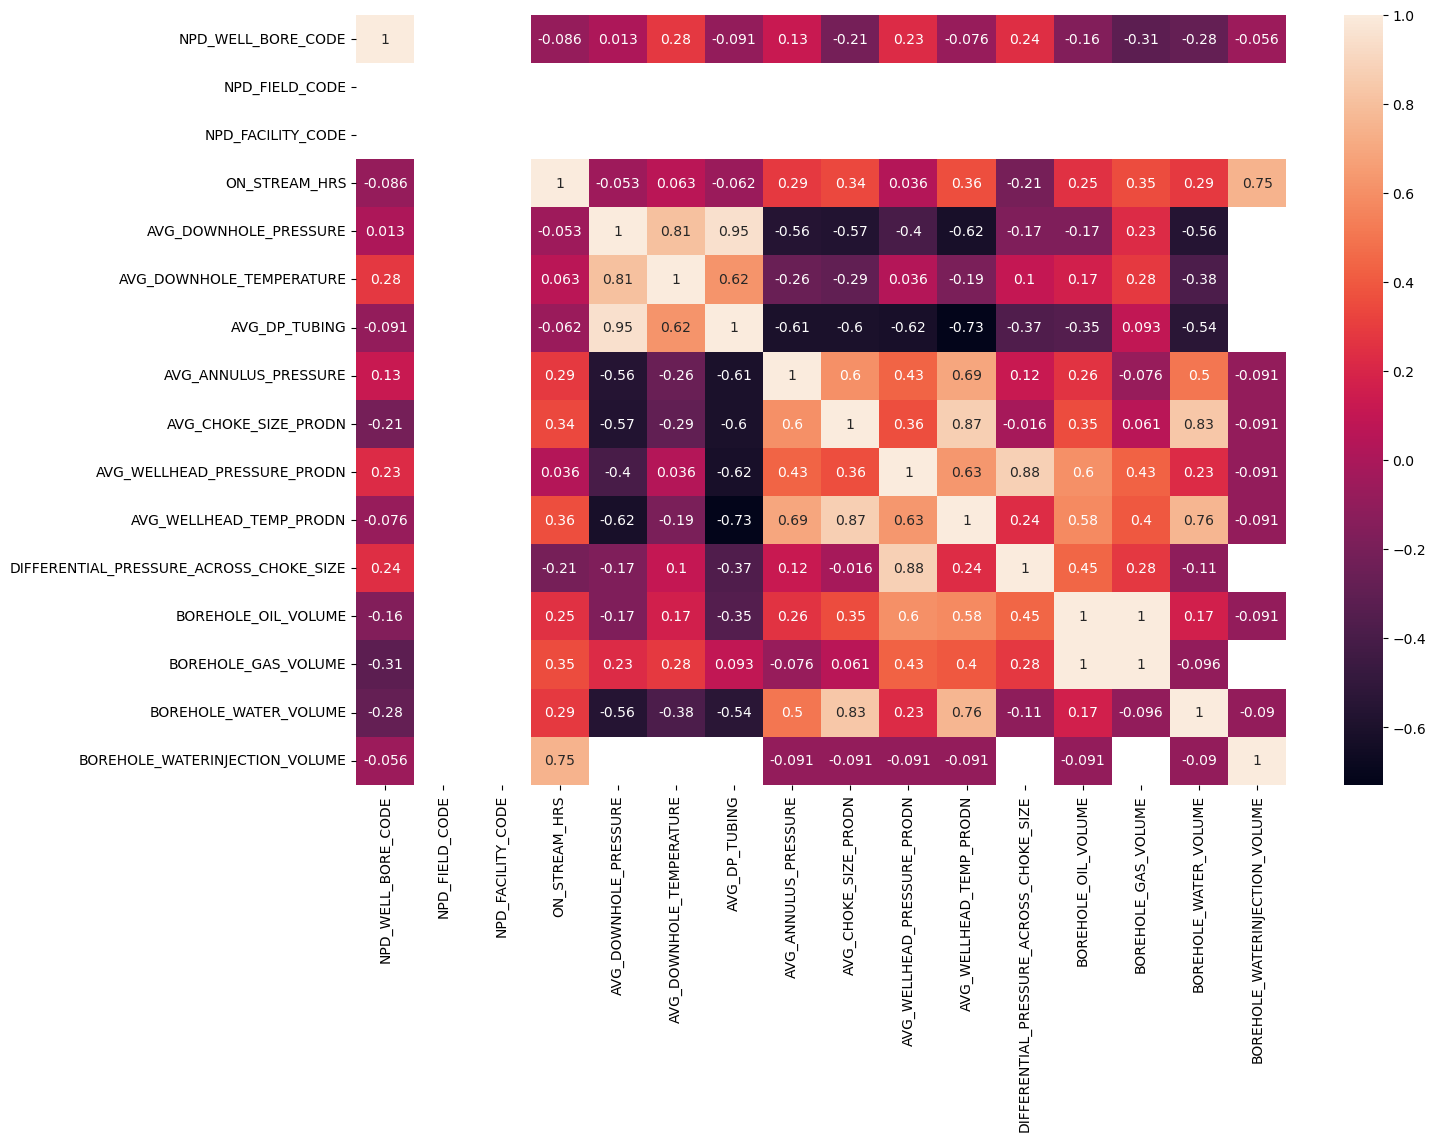

In [4]:
numeric_df = newdf.select_dtypes(include=[np.number])
data= numeric_df.corr()
  
# plotting the heatmap
plt.figure(figsize=(15, 10))
hm = sns.heatmap(data=data, annot=True)

# displaying the plotted heatmap
plt.show()

In [5]:

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BOREHOLE_WATERINJECTION_VOLUME","AVG_CHOKE_UNIT_OF_MEASUREMENT","FLOW_KIND","WELL_TYPE","BOREHOLE_GAS_VOLUME"]
newdf = newdf.drop(to_drop, axis=1)
print(newdf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   DATE_OF_PROD                             15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE                       15634 non-null  int64         
 2   ON_STREAM_HRS                            15634 non-null  float64       
 3   AVG_DOWNHOLE_TEMPERATURE                 15634 non-null  float64       
 4   AVG_ANNULUS_PRESSURE                     15634 non-null  float64       
 5   AVG_CHOKE_SIZE_PRODN                     15634 non-null  float64       
 6   AVG_WELLHEAD_PRESSURE_PRODN              15634 non-null  float64       
 7   AVG_WELLHEAD_TEMP_PRODN                  15634 non-null  float64       
 8   DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE  15634 non-null  float64       
 9   BOREHOLE_OIL_VOLUME                    

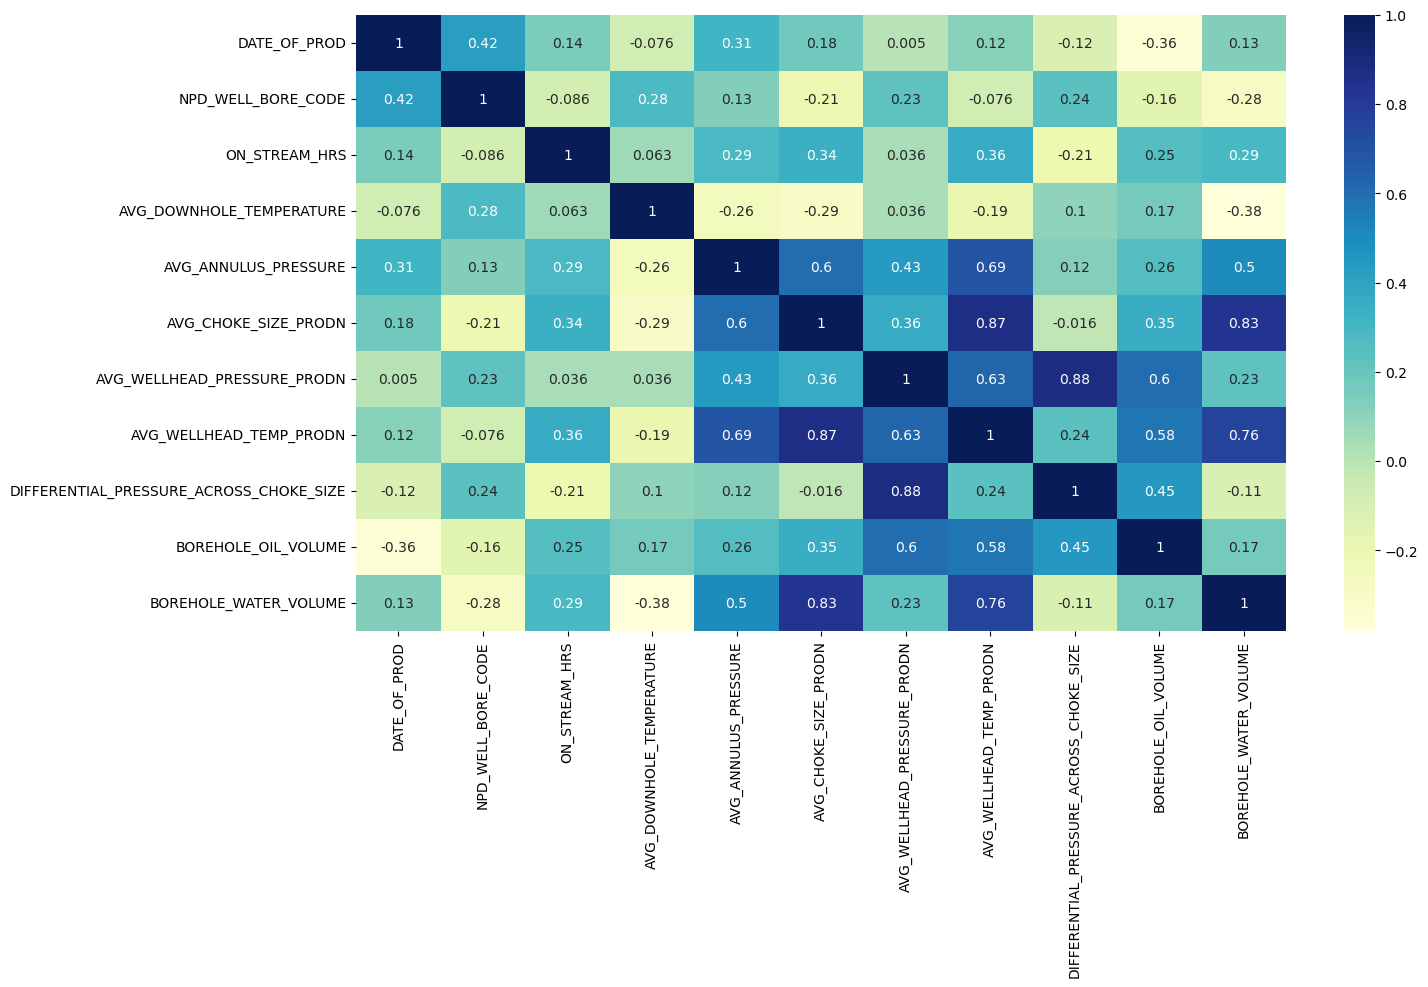

In [6]:
plt.figure(figsize=(15,8))
dataplot = sns.heatmap(newdf.corr(numeric_only=False), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [7]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESSURE','AVG_CHOKE_SIZE_PRODN','AVG_WELLHEAD_PRESSURE_PRODN','AVG_WELLHEAD_TEMP_PRODN']] = scaler.fit_transform(newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESSURE','AVG_CHOKE_SIZE_PRODN','AVG_WELLHEAD_PRESSURE_PRODN','AVG_WELLHEAD_TEMP_PRODN']])


#Taking the data of wells 2 to 4 since they were the ones with the Least number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BOREHOLE_OIL_VOLUME'],axis=1)
y= fdf[['BOREHOLE_OIL_VOLUME','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

reg_all = LinearRegression()

In [8]:
x_train_final = X_train.drop(['DATE_OF_PROD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATE_OF_PROD',"NPD_WELL_BORE_CODE"],axis = 1)

In [9]:
y_test_final = y_test['BOREHOLE_OIL_VOLUME']
y_train_final = y_train['BOREHOLE_OIL_VOLUME']

In [10]:
X = fdf.drop(['DATE_OF_PROD','BOREHOLE_OIL_VOLUME'],axis=1).values
y= fdf['BOREHOLE_OIL_VOLUME']

In [11]:
x_train_final

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESSURE,AVG_CHOKE_SIZE_PRODN,AVG_WELLHEAD_PRESSURE_PRODN,AVG_WELLHEAD_TEMP_PRODN,DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE,BOREHOLE_WATER_VOLUME
3633,0.96,0.000000,0.500000,0.99,0.233577,0.968085,5.0,4629.0
5156,0.72,0.963303,0.000000,0.36,0.605839,0.840426,50.0,6.0
7929,0.96,0.917431,0.766667,0.45,0.226277,0.946809,5.0,3005.0
5546,0.96,0.972477,0.000000,0.43,0.481752,0.925532,32.0,759.0
7824,0.96,0.917431,0.666667,1.00,0.211679,0.946809,2.0,3317.0
...,...,...,...,...,...,...,...,...
5937,0.96,0.972477,0.000000,0.62,0.335766,0.968085,13.0,3374.0
5972,0.96,0.972477,0.000000,1.00,0.299270,0.957447,9.0,3359.0
6136,0.92,0.954128,0.000000,0.57,0.306569,0.946809,12.0,4301.0
1606,0.96,0.972477,0.366667,1.00,0.233577,0.861702,5.0,2145.0


In [12]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression()

In [13]:
y_pred = reg_all.predict(x_test_final)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions on test set
y_pred = reg_all.predict(x_test_final)

# Calculate metrics
r2 = r2_score(y_test_final, y_pred)
mse = mean_squared_error(y_test_final, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test_final, y_pred)

# Print results
print("The R2 value:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


The R2 value: 0.5546655627419907
Mean Squared Error (MSE): 845894.8917442894
Root Mean Squared Error (RMSE): 919.7254436756056
Mean Absolute Error (MAE): 707.7508701507589


In [15]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v))

Feature: 0, Score: 1310.1958
Feature: 1, Score: 283.7652
Feature: 2, Score: -1199.2799
Feature: 3, Score: 43.9018
Feature: 4, Score: 350.4864
Feature: 5, Score: 2620.3704
Feature: 6, Score: 14.0761
Feature: 7, Score: -0.4076


In [16]:
reg_all.coef_

array([ 1.31019583e+03,  2.83765208e+02, -1.19927985e+03,  4.39017691e+01,
        3.50486430e+02,  2.62037040e+03,  1.40760737e+01, -4.07588864e-01])

In [17]:
reg_all.intercept_

-1098.6001302893826

### Correlation from Linear Regression

In [19]:
print("""The Correlation from the Linear Model is: 

BOREHOLE_OIL_VOLUME = {:.5f} 
                      + {:.5f} * ON_STREAM_HRS 
                      + {:.5f} * AVG_DOWNHOLE_TEMPERATURE 
                      + {:.5f} * AVG_ANNULUS_PRESSURE 
                      + {:.5f} * AVG_CHOKE_SIZE_PRODN 
                      + {:.5f} * AVG_WELLHEAD_PRESSURE_PRODN 
                      + {:.5f} * AVG_WELLHEAD_TEMP_PRODN 
                      + {:.5f} * DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE 
                      + {:.5f} * BOREHOLE_WATER_VOLUME""".format(
    reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],
    reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], 
    reg_all.coef_[7]))


The Correlation from the Linear Model is: 

BOREHOLE_OIL_VOLUME = -1098.60013 
                      + 1310.19583 * ON_STREAM_HRS 
                      + 283.76521 * AVG_DOWNHOLE_TEMPERATURE 
                      + -1199.27985 * AVG_ANNULUS_PRESSURE 
                      + 43.90177 * AVG_CHOKE_SIZE_PRODN 
                      + 350.48643 * AVG_WELLHEAD_PRESSURE_PRODN 
                      + 2620.37040 * AVG_WELLHEAD_TEMP_PRODN 
                      + 14.07607 * DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE 
                      + -0.40759 * BOREHOLE_WATER_VOLUME


### Polynomial Regression

In [21]:
# Applying Polynomial Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape[1]


# Predictions on test set
y_pred = lin_reg.predict(x_pol_test)

r2_score = lin_reg.score(x_pol_test, y_test_final)
mse = mean_squared_error(y_test_final, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_final, y_pred)

# Print results
print("The R2 value: ", r2_score)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


The R2 value:  0.9350239942495188
Mean Squared Error (MSE): 123419.31535475735
Root Mean Squared Error (RMSE): 351.31085288495905
Mean Absolute Error (MAE): 221.4447362469687


In [22]:
a =np.array(poly_reg.get_feature_names_out(['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESSURE','AVG_CHOKE_SIZE_PRODN','AVG_WELLHEAD_PRESSURE_PRODN','AVG_WELLHEAD_TEMP_PRODN','DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE','BOREHOLE_WATER_VOLUME']))

In [23]:
print(len(a))

495


In [24]:
b = np.array(lin_reg.coef_)

In [25]:
Correlation_Poly = pd.DataFrame({'Coefficients':b, 'Feature Name':a})

In [26]:
pd.set_option('display.max_rows',30)

In [27]:
Correlation_Poly.head(30)

,Coefficients,Feature Name
0,-26.550971,1
1,99.558162,ON_STREAM_HRS
2,-22.288233,AVG_DOWNHOLE_TEMPERATURE
3,-41.814225,AVG_ANNULUS_PRESSURE
4,87.152479,AVG_CHOKE_SIZE_PRODN
5,21.263777,AVG_WELLHEAD_PRESSURE_PRODN
6,42.097224,AVG_WELLHEAD_TEMP_PRODN
7,-10.590162,DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE
8,6.912359,BOREHOLE_WATER_VOLUME
9,64.682593,ON_STREAM_HRS^2


In [28]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -26.55097
Feature: 1, Score: 99.55816
Feature: 2, Score: -22.28823
Feature: 3, Score: -41.81422
Feature: 4, Score: 87.15248
Feature: 5, Score: 21.26378
Feature: 6, Score: 42.09722
Feature: 7, Score: -10.59016
Feature: 8, Score: 6.91236
Feature: 9, Score: 64.68259
Feature: 10, Score: 48.97656
Feature: 11, Score: 9.96660
Feature: 12, Score: 74.59248
Feature: 13, Score: 11.83028
Feature: 14, Score: 46.70959
Feature: 15, Score: 16.45036
Feature: 16, Score: 0.38394
Feature: 17, Score: -26.10556
Feature: 18, Score: -15.94845
Feature: 19, Score: 56.98852
Feature: 20, Score: 6.50529
Feature: 21, Score: -12.47212
Feature: 22, Score: 65.43548
Feature: 23, Score: -9.87163
Feature: 24, Score: -50.98718
Feature: 25, Score: 14.89448
Feature: 26, Score: -1.18866
Feature: 27, Score: -10.61995
Feature: 28, Score: 43.70750
Feature: 29, Score: -21.89807
Feature: 30, Score: 66.14600
Feature: 31, Score: 13.08048
Feature: 32, Score: 57.27579
Feature: 33, Score: 31.99837
Feature: 34, Score

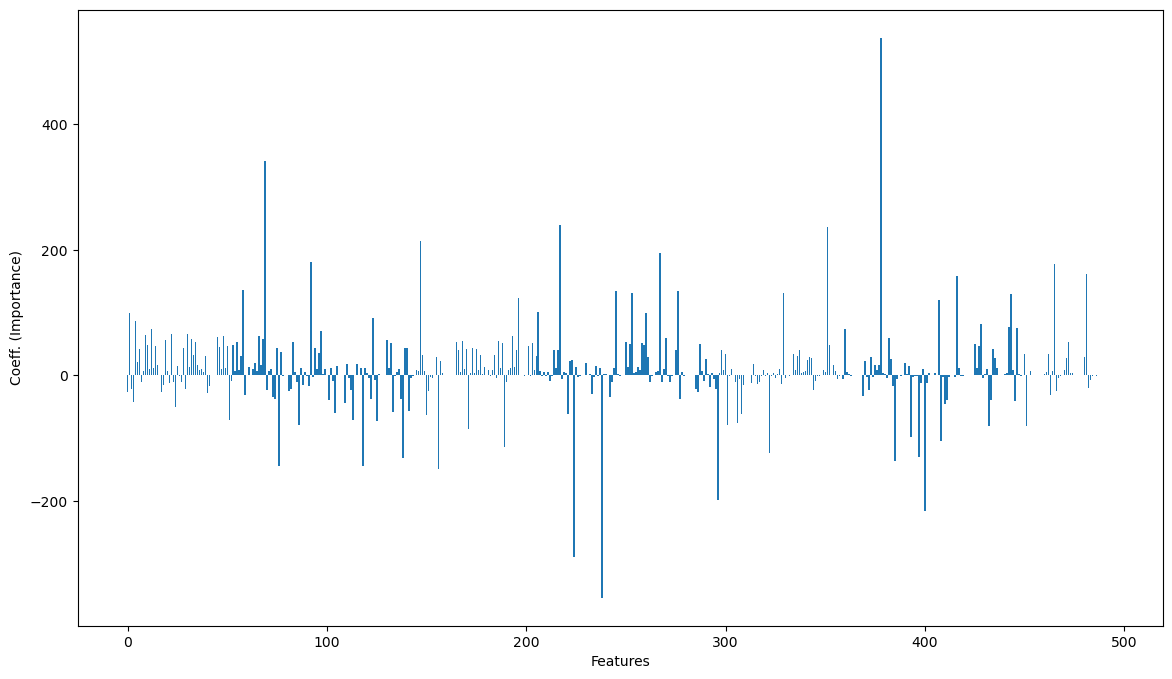

In [29]:
# plot feature importance
plt.figure(figsize = (14,8))
plt.xlabel("Features")
plt.ylabel("Coeff. (Importance)")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [30]:
y_pred = lin_reg.predict(x_pol_test)

In [31]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df.head(50)

,Real Values,Predicted Values
6805,643.0,1045.743440
6756,613.0,-55.747448
5221,4634.0,4353.307123
4435,688.0,619.710780
5261,3571.0,3458.802000
...,...,...
6176,928.0,832.989017
4404,719.0,918.495458
4942,0.0,-13.777899
3628,575.0,560.070108


In [32]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATE_OF_PROD":"count"})

,DATE_OF_PROD
NPD_WELL_BORE_CODE,
5351,600
5599,614
7078,242


## Actual V/S Model Prediction plot for Well No.- 5599

### Linear Regression

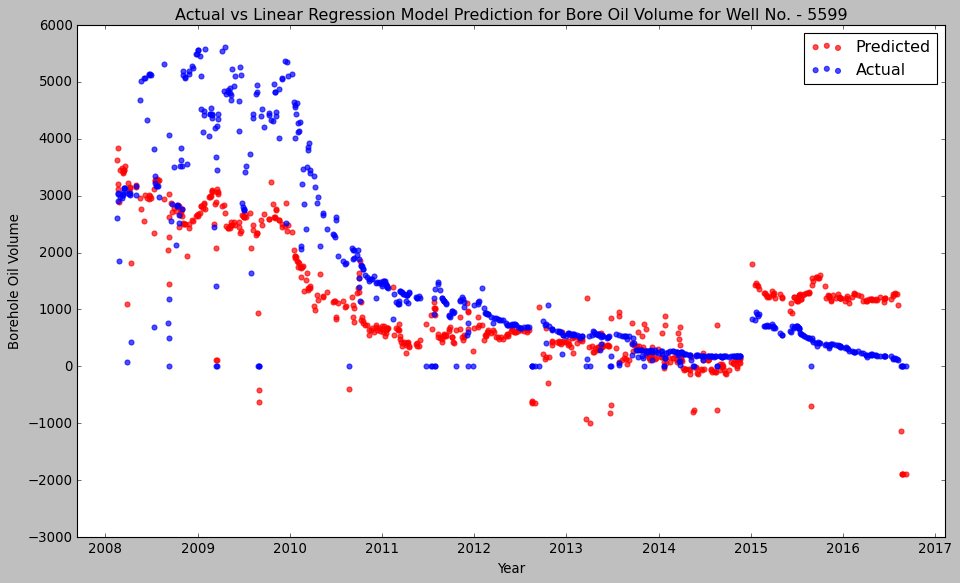

The R2 value for linear regression for oil volume production in well 5599 is: 0.5519981928044642
Mean Squared Error (MSE): 1214726.4942751836
Root Mean Squared Error (RMSE): 1102.1463125534576
Mean Absolute Error (MAE): 814.4146965611686


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter test data for Well No. 5599
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]
y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

# Drop non-numeric columns
x_test_5599final = X_test_5599.drop(['DATE_OF_PROD', "NPD_WELL_BORE_CODE"], axis=1)

# Predictions
y_pred = reg_all.predict(x_test_5599final)

# Convert date to list for plotting
dates = X_test_5599["DATE_OF_PROD"].tolist()

# Plot Actual vs Predicted Values
plt.style.use('classic')
plt.figure(figsize=(14, 8))
plt.scatter(dates, y_pred, label='Predicted', color='red', alpha=0.7)
plt.scatter(dates, y_test_5599['BOREHOLE_OIL_VOLUME'], label='Actual', color='blue', alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Borehole Oil Volume")
plt.title('Actual vs Linear Regression Model Prediction for Bore Oil Volume for Well No. - 5599')
plt.show()

# Extract target variable
y_test_5599_final = y_test_5599['BOREHOLE_OIL_VOLUME']

# Evaluation Metrics
r2_score = reg_all.score(x_test_5599final, y_test_5599_final)
mse = mean_squared_error(y_test_5599_final, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_5599_final, y_pred)

# Print Results
print("The R2 value for linear regression for oil volume production in well 5599 is:", r2_score)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



In [36]:
model_equation = """The linear regression model for Bore Oil Volume is:

BORE_OIL_VOL = {:.5f} + {:.5f} * ON_STREAM_HRS
               + {:.5f} * AVG_DOWNHOLE_TEMPERATURE
               + {:.5f} * AVG_ANNULUS_PRESS
               + {:.5f} * AVG_CHOKE_SIZE_P
               + {:.5f} * AVG_WHP_P
               + {:.5f} * AVG_WHT_P
               + {:.5f} * DP_CHOKE_SIZE
               + {:.5f} * BORE_WAT_VOL
""".format(
    reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],
    reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]
)

print(model_equation)


The linear regression model for Bore Oil Volume is:

BORE_OIL_VOL = -1098.60013 + 1310.19583 * ON_STREAM_HRS
               + 283.76521 * AVG_DOWNHOLE_TEMPERATURE
               + -1199.27985 * AVG_ANNULUS_PRESS
               + 43.90177 * AVG_CHOKE_SIZE_P
               + 350.48643 * AVG_WHP_P
               + 2620.37040 * AVG_WHT_P
               + 14.07607 * DP_CHOKE_SIZE
               + -0.40759 * BORE_WAT_VOL



### Polynomial Regression

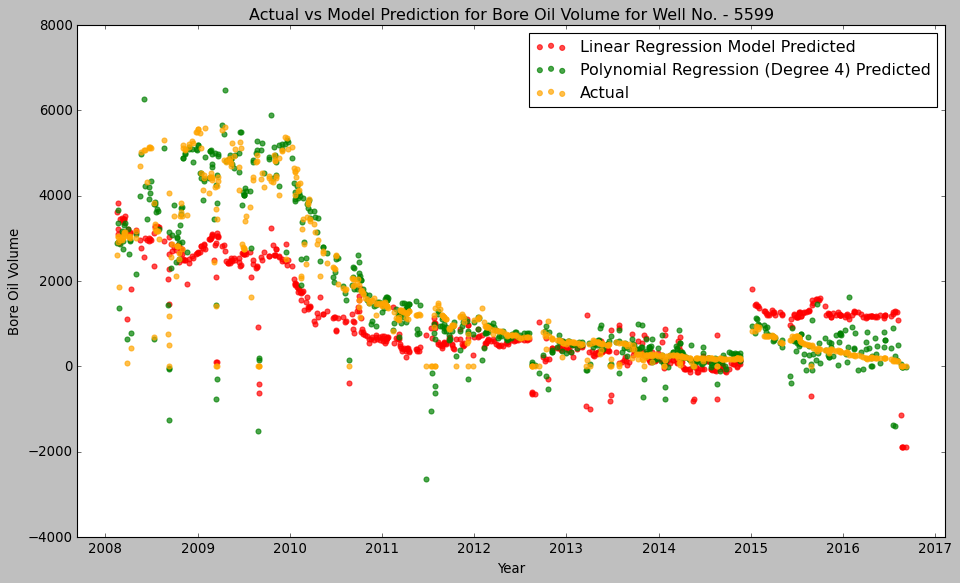

The R2 value for linear regression is: 0.5519981928044642
Mean Squared Error (MSE) for Linear Regression: 1214726.4942751836
Root Mean Squared Error (RMSE) for Linear Regression: 1102.1463125534576
Mean Absolute Error (MAE) for Linear Regression: 814.4146965611686

The R2 value for Polynomial regression (Degree 4) is: 0.9399828412598168
Mean Squared Error (MSE) for Polynomial Regression: 162732.45255236182
Root Mean Squared Error (RMSE) for Polynomial Regression: 403.4011062854957
Mean Absolute Error (MAE) for Polynomial Regression: 260.4647771591106


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter test data for Well No. 5599
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]
y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

# Drop non-numeric columns
x_test_5599final = X_test_5599.drop(['DATE_OF_PROD', "NPD_WELL_BORE_CODE"], axis=1)

# Predictions for Linear Regression
y_linear = reg_all.predict(x_test_5599final)

# Transform features for Polynomial Regression
x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

# Convert date to list for plotting
dates = X_test_5599["DATE_OF_PROD"].tolist()

# Plot Actual vs Predicted Values
plt.style.use('classic')
plt.figure(figsize=(14, 8))
plt.scatter(dates, y_linear, label='Linear Regression Model Predicted', color='red', alpha=0.7)
plt.scatter(dates, y_poly, label='Polynomial Regression (Degree 4) Predicted', color='green', alpha=0.7)
plt.scatter(dates, y_test_5599['BOREHOLE_OIL_VOLUME'], label='Actual', color='orange', alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore Oil Volume")
plt.title('Actual vs Model Prediction for Bore Oil Volume for Well No. - 5599')
plt.show()

# Extract target variable
y_test_5599_final = y_test_5599['BOREHOLE_OIL_VOLUME']

# Evaluation Metrics for Linear Regression
r2_linear = reg_all.score(x_test_5599final, y_test_5599_final)
mse_linear = mean_squared_error(y_test_5599_final, y_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test_5599_final, y_linear)

# Evaluation Metrics for Polynomial Regression
r2_poly = lin_reg.score(x_pol_test_5599, y_test_5599_final)
mse_poly = mean_squared_error(y_test_5599_final, y_poly)
rmse_poly = mse_poly ** 0.5
mae_poly = mean_absolute_error(y_test_5599_final, y_poly)

# Print Results
print("The R2 value for linear regression is:", r2_linear)
print("Mean Squared Error (MSE) for Linear Regression:", mse_linear)
print("Root Mean Squared Error (RMSE) for Linear Regression:", rmse_linear)
print("Mean Absolute Error (MAE) for Linear Regression:", mae_linear)

print("\nThe R2 value for Polynomial regression (Degree 4) is:", r2_poly)
print("Mean Squared Error (MSE) for Polynomial Regression:", mse_poly)
print("Root Mean Squared Error (RMSE) for Polynomial Regression:", rmse_poly)
print("Mean Absolute Error (MAE) for Polynomial Regression:", mae_poly)




## Actual V/S Model Prediction plot for Well No.- 5351

### Linear Regression

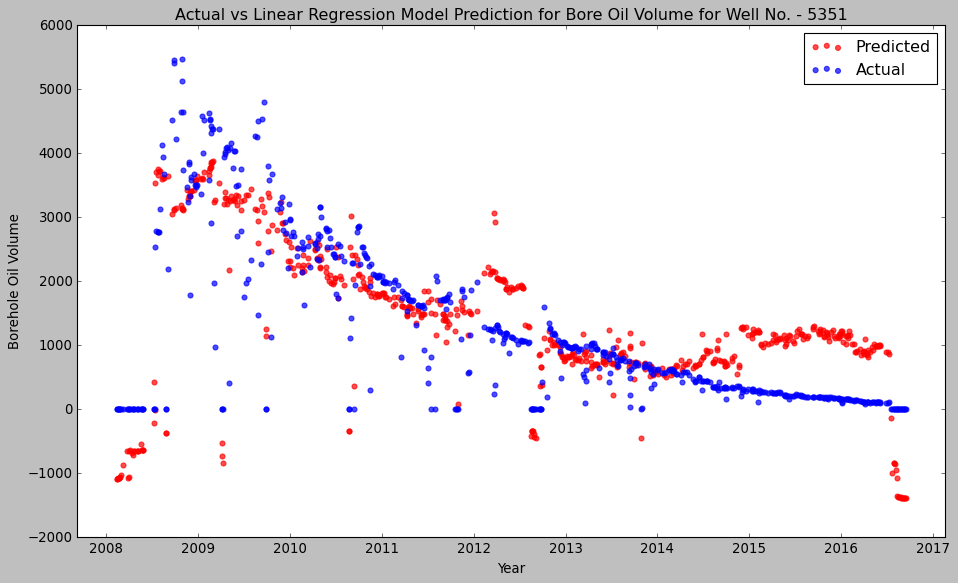

The R2 value is: 0.6618470078873169
Mean Squared Error (MSE): 560948.1180356254
Root Mean Squared Error (RMSE): 748.9646974561788
Mean Absolute Error (MAE): 607.0810831909598


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter test data for Well No. 5351
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]
y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

# Drop non-numeric columns
x_test_5351final = X_test_5351.drop(['DATE_OF_PROD', "NPD_WELL_BORE_CODE"], axis=1)

# Predictions
y_pred = reg_all.predict(x_test_5351final)

# Convert date to list for plotting
dates = X_test_5351["DATE_OF_PROD"].tolist()

# Plot Actual vs Predicted Values
plt.style.use('classic')
plt.figure(figsize=(14, 8))
plt.scatter(dates, y_pred, label='Predicted', color='red', alpha=0.7)
plt.scatter(dates, y_test_5351['BOREHOLE_OIL_VOLUME'], label='Actual', color='blue', alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Borehole Oil Volume")
plt.title('Actual vs Linear Regression Model Prediction for Bore Oil Volume for Well No. - 5351')
plt.show()

# Extract target variable
y_test_5351_final = y_test_5351['BOREHOLE_OIL_VOLUME']

# Evaluation Metrics
r2_score = reg_all.score(x_test_5351final, y_test_5351_final)
mse = mean_squared_error(y_test_5351_final, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_5351_final, y_pred)

# Print Results
print("The R2 value is:", r2_score)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



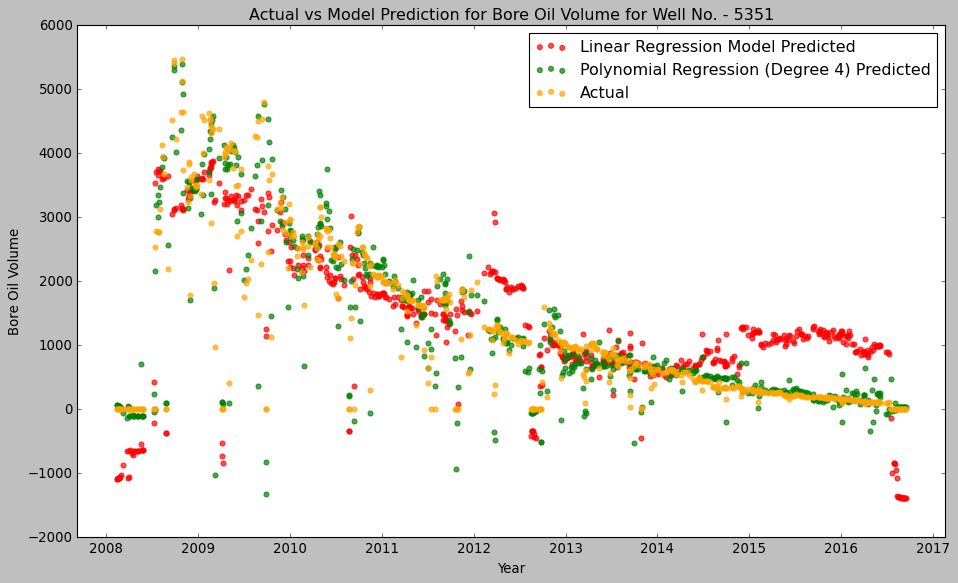

The R2 value for linear regression is: 0.6618470078873169
Mean Squared Error (MSE) for Linear Regression: 560948.1180356254
Root Mean Squared Error (RMSE) for Linear Regression: 748.9646974561788
Mean Absolute Error (MAE) for Linear Regression: 607.0810831909598

The R2 value for Polynomial regression (Degree 4) is: 0.942959791507925
Mean Squared Error (MSE) for Polynomial Regression: 94621.66046819111
Root Mean Squared Error (RMSE) for Polynomial Regression: 307.60634009751993
Mean Absolute Error (MAE) for Polynomial Regression: 196.06262893178334


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter test data for Well No. 5351
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]
y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

# Drop non-numeric columns
x_test_5351final = X_test_5351.drop(['DATE_OF_PROD', "NPD_WELL_BORE_CODE"], axis=1)

# Predictions for Linear Regression
y_linear = reg_all.predict(x_test_5351final)

# Transform features for Polynomial Regression
x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

# Convert date to list for plotting
dates = X_test_5351["DATE_OF_PROD"].tolist()

# Plot Actual vs Predicted Values
plt.style.use('classic')
plt.figure(figsize=(14, 8))
plt.scatter(dates, y_linear, label='Linear Regression Model Predicted', color='red', alpha=0.7)
plt.scatter(dates, y_poly, label='Polynomial Regression (Degree 4) Predicted', color='green', alpha=0.7)
plt.scatter(dates, y_test_5351['BOREHOLE_OIL_VOLUME'], label='Actual', color='orange', alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore Oil Volume")
plt.title('Actual vs Model Prediction for Bore Oil Volume for Well No. - 5351')
plt.show()

# Extract target variable
y_test_5351_final = y_test_5351['BOREHOLE_OIL_VOLUME']

# Evaluation Metrics for Linear Regression
r2_linear = reg_all.score(x_test_5351final, y_test_5351_final)
mse_linear = mean_squared_error(y_test_5351_final, y_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test_5351_final, y_linear)

# Evaluation Metrics for Polynomial Regression
r2_poly = lin_reg.score(x_pol_test_5351, y_test_5351_final)
mse_poly = mean_squared_error(y_test_5351_final, y_poly)
rmse_poly = mse_poly ** 0.5
mae_poly = mean_absolute_error(y_test_5351_final, y_poly)

# Print Results
print("The R2 value for linear regression is:", r2_linear)
print("Mean Squared Error (MSE) for Linear Regression:", mse_linear)
print("Root Mean Squared Error (RMSE) for Linear Regression:", rmse_linear)
print("Mean Absolute Error (MAE) for Linear Regression:", mae_linear)

print("\nThe R2 value for Polynomial regression (Degree 4) is:", r2_poly)
print("Mean Squared Error (MSE) for Polynomial Regression:", mse_poly)
print("Root Mean Squared Error (RMSE) for Polynomial Regression:", rmse_poly)
print("Mean Absolute Error (MAE) for Polynomial Regression:", mae_poly)




## Actual V/S Model Prediction plot for Well No.- 7078

### Linear Regression

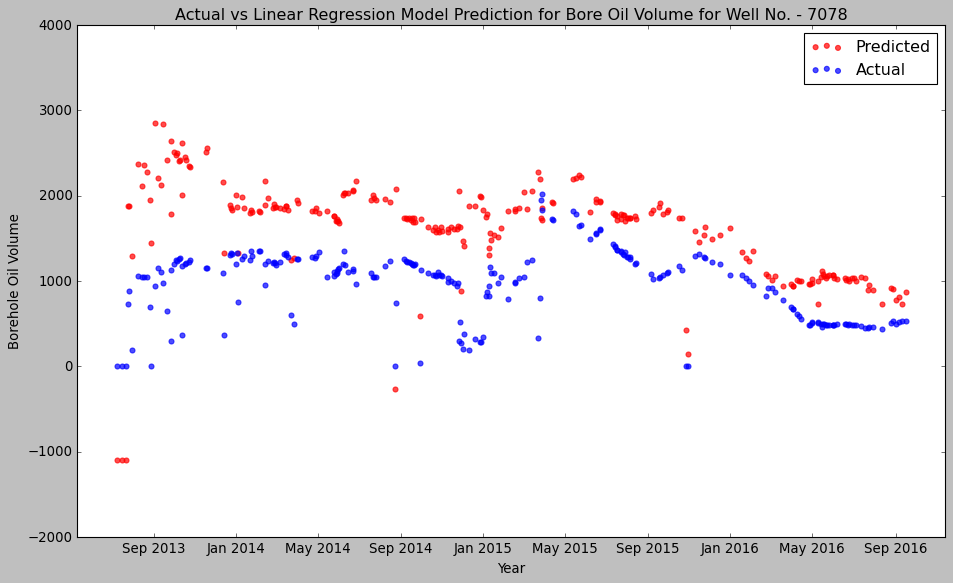

The R2 value is: -2.7451272076018896
Mean Squared Error (MSE): 616578.6118733371
Root Mean Squared Error (RMSE): 785.2251981905172
Mean Absolute Error (MAE): 686.7189807288084


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter test data for Well No. 7078
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]
y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

# Drop non-numeric columns
x_test_7078final = X_test_7078.drop(['DATE_OF_PROD', "NPD_WELL_BORE_CODE"], axis=1)

# Predictions
y_pred = reg_all.predict(x_test_7078final)

# Convert date to list for plotting
dates = X_test_7078["DATE_OF_PROD"].tolist()

# Plot Actual vs Predicted Values
plt.style.use('classic')
plt.figure(figsize=(14, 8))
plt.scatter(dates, y_pred, label='Predicted', color='red', alpha=0.7)
plt.scatter(dates, y_test_7078['BOREHOLE_OIL_VOLUME'], label='Actual', color='blue', alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Borehole Oil Volume")
plt.title('Actual vs Linear Regression Model Prediction for Bore Oil Volume for Well No. - 7078')
plt.show()

# Extract target variable
y_test_7078_final = y_test_7078['BOREHOLE_OIL_VOLUME']

# Evaluation Metrics
r2_score = reg_all.score(x_test_7078final, y_test_7078_final)
mse = mean_squared_error(y_test_7078_final, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_7078_final, y_pred)

# Print Results
print("The R2 value is:", r2_score)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



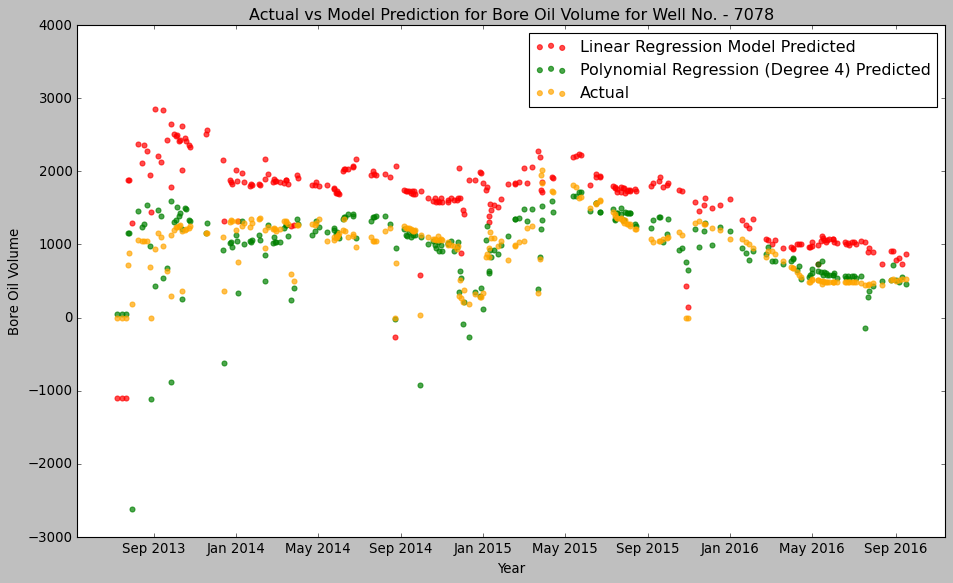

The R2 value for linear regression is: -2.7451272076018896
Mean Squared Error (MSE) for Linear Regression: 616578.6118733371
Root Mean Squared Error (RMSE) for Linear Regression: 785.2251981905172
Mean Absolute Error (MAE) for Linear Regression: 686.7189807288084

The R2 value for Polynomial regression (Degree 4) is: 0.4225187810499511
Mean Squared Error (MSE) for Polynomial Regression: 95073.55788620612
Root Mean Squared Error (RMSE) for Polynomial Regression: 308.3400037072811
Mean Absolute Error (MAE) for Polynomial Regression: 185.37432000339948


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Filter test data for Well No. 7078
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]
y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

# Drop non-numeric columns
x_test_7078final = X_test_7078.drop(['DATE_OF_PROD', "NPD_WELL_BORE_CODE"], axis=1)

# Predictions for Linear Regression
y_linear = reg_all.predict(x_test_7078final)

# Transform features for Polynomial Regression
x_pol_test_7078 = poly_reg.fit_transform(x_test_7078final)
y_poly = lin_reg.predict(x_pol_test_7078)

# Convert date to list for plotting
dates = X_test_7078["DATE_OF_PROD"].tolist()

# Plot Actual vs Predicted Values
plt.style.use('classic')
plt.figure(figsize=(14, 8))
plt.scatter(dates, y_linear, label='Linear Regression Model Predicted', color='red', alpha=0.7)
plt.scatter(dates, y_poly, label='Polynomial Regression (Degree 4) Predicted', color='green', alpha=0.7)
plt.scatter(dates, y_test_7078['BOREHOLE_OIL_VOLUME'], label='Actual', color='orange', alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore Oil Volume")
plt.title('Actual vs Model Prediction for Bore Oil Volume for Well No. - 7078')
plt.show()

# Extract target variable
y_test_7078_final = y_test_7078['BOREHOLE_OIL_VOLUME']

# Evaluation Metrics for Linear Regression
r2_linear = reg_all.score(x_test_7078final, y_test_7078_final)
mse_linear = mean_squared_error(y_test_7078_final, y_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test_7078_final, y_linear)

# Evaluation Metrics for Polynomial Regression
r2_poly = lin_reg.score(x_pol_test_7078, y_test_7078_final)
mse_poly = mean_squared_error(y_test_7078_final, y_poly)
rmse_poly = mse_poly ** 0.5
mae_poly = mean_absolute_error(y_test_7078_final, y_poly)

# Print Results
print("The R2 value for linear regression is:", r2_linear)
print("Mean Squared Error (MSE) for Linear Regression:", mse_linear)
print("Root Mean Squared Error (RMSE) for Linear Regression:", rmse_linear)
print("Mean Absolute Error (MAE) for Linear Regression:", mae_linear)

print("\nThe R2 value for Polynomial regression (Degree 4) is:", r2_poly)
print("Mean Squared Error (MSE) for Polynomial Regression:", mse_poly)
print("Root Mean Squared Error (RMSE) for Polynomial Regression:", rmse_poly)
print("Mean Absolute Error (MAE) for Polynomial Regression:", mae_poly)




In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

# Define custom metrics
def r_square(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

# Build the model
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=x_train_final.shape[1]))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the model
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=[r_square, rmse])

# Train the model
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10,verbose=0, mode='min')
model.fit(
    x_train_final,
    y_train_final,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_split= .15,
    callbacks= [es]
)

C:\Users\vishn\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
155/155 - 5s - 33ms/step - loss: 1139.0288 - r_square: -6.8086e-01 - rmse: 1139.0288 - val_loss: 1090.8081 - val_r_square: -5.8816e-01 - val_rmse: 1090.8081
Epoch 2/100
155/155 - 1s - 3ms/step - loss: 1054.5203 - r_square: -4.2643e-01 - rmse: 1054.5203 - val_loss: 936.1194 - val_r_square: -1.0200e-01 - val_rmse: 936.1194
Epoch 3/100
155/155 - 1s - 4ms/step - loss: 888.9594 - r_square: 0.0210 - rmse: 888.9594 - val_loss: 812.8863 - val_r_square: 0.0831 - val_rmse: 812.8863
Epoch 4/100
155/155 - 1s - 3ms/step - loss: 839.2546 - r_square: 0.0912 - rmse: 839.2546 - val_loss: 818.8376 - val_r_square: 0.0941 - val_rmse: 818.8376
Epoch 5/100
155/155 - 1s - 3ms/step - loss: 812.0220 - r_square: 0.1521 - rmse: 812.0220 - val_loss: 781.8675 - val_r_square: 0.2211 - val_rmse: 781.8675
Epoch 6/100
155/155 - 1s - 4ms/step - loss: 779.4200 - r_square: 0.2093 - rmse: 779.4200 - val_loss: 750.9637 - val_r_square: 0.2374 - val_rmse: 750.9637
Epoch 7/100
155/155 - 1s - 3ms/step - loss: 762.3

In [86]:
model.evaluate(x_test_final, y_test_final, batch_size=50)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 425.9926 - r_square: 0.8147 - rmse: 425.9926


[418.1274108886719, 0.8264936804771423, 418.1274108886719]

In [94]:
model.save("neural_cnn.h5")

In [96]:
from keras.models import load_model

# Load the model from file
loaded_model = load_model("neural_cnn.h5")

In [98]:
def polynomial_pred(input_features):
    input_features = np.array(input_features).reshape(1, -1)
    
    # Use the trained model to predict
    
    prediction =lin_reg.predict(poly_reg.fit_transform(input_features))
    
    # If the output is a single value, you might want to flatten it
    return prediction[0]

In [100]:
def linear_pred(input_features):
    input_features = np.array(input_features).reshape(1, -1)
    
    # Use the trained model to predict
    prediction =reg_all.predict(input_features)
    
    # If the output is a single value, you might want to flatten it
    return prediction[0]

In [102]:
def predict_value_neural(input_features):
    
    input_features = np.array(input_features).reshape(1, -1)
    
    # Use the trained model to predict
    prediction = model.predict(input_features)
    
    # If the output is a single value, you might want to flatten it
    return prediction[0][0]

In [104]:
actual = []
pred = []
pred_linear = []
poly_pred = []
for ind in range(10):
    actual.append(y_test_5351_final.iloc[ind])
    pred.append(predict_value_neural(x_test_5351final.iloc[ind]))
    pred_linear.append(linear_pred(x_test_5351final.iloc[ind]))
    poly_pred.append(polynomial_pred(x_test_5351final.iloc[ind]))
dataf = pd.DataFrame({"actual" : actual , "pred" : pred, " linear" : pred_linear , "poly" : poly_pred})
dataf

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,actual,pred,linear,poly
0,643.0,1067.713135,493.614148,1045.743440
1,613.0,1445.399902,911.346131,-55.747448
2,4634.0,4856.778320,3181.816305,4353.307123
3,3571.0,3888.004883,3404.489265,3458.802000
4,294.0,804.666138,1205.980409,278.129927
5,2920.0,3092.627197,2735.390439,3122.799387
6,783.0,791.917297,864.529461,720.833282
7,261.0,771.084961,1104.048486,277.103568
8,437.0,648.315125,901.131416,516.526680
9,4377.0,2641.883301,3858.644741,4513.617040


In [106]:
x_test_5351final.iloc[3]
# y_test_5351_final.iloc[3]

ON_STREAM_HRS                               0.960000
AVG_DOWNHOLE_TEMPERATURE                    0.963303
AVG_ANNULUS_PRESSURE                        0.000000
AVG_CHOKE_SIZE_PRODN                        0.360000
AVG_WELLHEAD_PRESSURE_PRODN                 0.583942
AVG_WELLHEAD_TEMP_PRODN                     0.797872
DIFFERENTIAL_PRESSURE_ACROSS_CHOKE_SIZE    47.000000
BOREHOLE_WATER_VOLUME                       2.000000
Name: 5261, dtype: float64

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


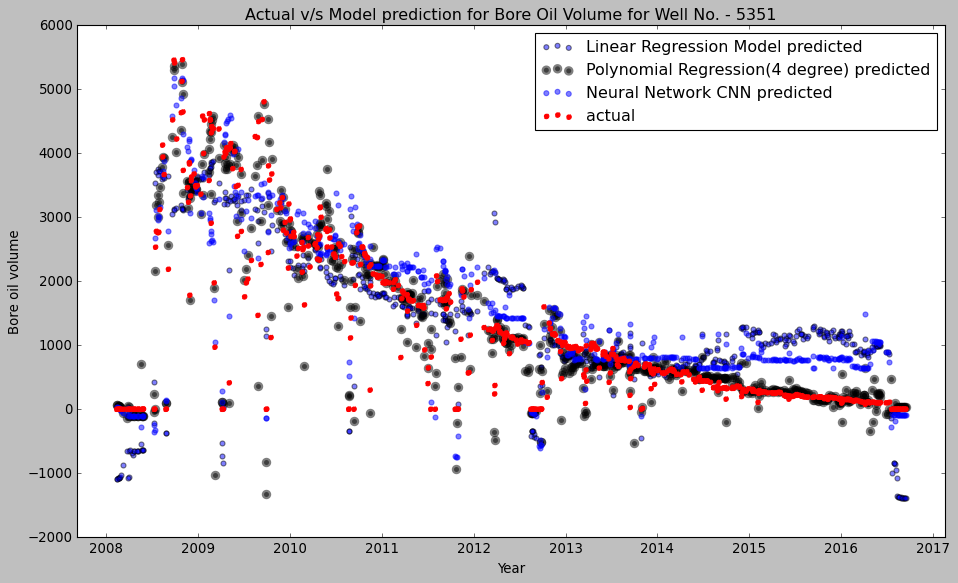

In [110]:
# %matlpotlib inline

X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATE_OF_PROD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

y_neural = model.predict(x_test_5351final)

plt.style.use('classic')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATE_OF_PROD"].tolist(),y_linear,label='Linear Regression Model predicted' , alpha = 0.5 )
plt.scatter(X_test_5351["DATE_OF_PROD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'black' , alpha = 0.5 , linewidth = 4)
plt.scatter(X_test_5351["DATE_OF_PROD"].tolist(),y_neural,label='Neural Network CNN predicted', color = 'blue' , alpha = 0.5)
plt.scatter(X_test_5351["DATE_OF_PROD"].tolist(),y_test_5351['BOREHOLE_OIL_VOLUME'],label='actual', color = 'red' , linestyle = "--")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')
plt.savefig('my_plot.png') 
